### Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd
np.random.seed(1001)

import os
import shutil

import IPython.display as ipd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm_notebook

### Loading data

In [42]:
data = pd.read_excel("audio_to_text.xlsx", columns=['FileName','File'])
data.index+=1

In [43]:
data.head(5)

,FileName,File,Transcript
1,mrt_01523_00028548203.wav,E:\data\mrt_01523_00028548203.wav,मी तुमच्यासाठी काही करू शकतो का ?
2,mrt_01523_00029882518.wav,E:\data\mrt_01523_00029882518.wav,एक बस दोन तासांपूर्वी येऊन गेली आणि पुढची बस य...
3,mrt_01523_00032624107.wav,E:\data\mrt_01523_00032624107.wav,मी ठीक आहे माझ्यासाठी काय आज्ञा आहे ?
4,mrt_01523_00053998544.wav,E:\data\mrt_01523_00053998544.wav,मी मदत करण्याचा प्रयत्न करते . तुमच्यासाठी मी ...
5,mrt_01523_00064455618.wav,E:\data\mrt_01523_00064455618.wav,एक बस दोन तासांपूर्वी येऊन गेली आणि पुढची बस य...


In [44]:
print("Number of training examples=", data.shape[0], "  Number of classes=", len(data.FileName.unique()))

Number of training examples= 1569   Number of classes= 1569


### Spliting data into inputs and outputs

In [54]:
X_data = data.File
Y_data = data.Transcript

In [59]:
import random
randm = random.randrange(1569)
exfile = data['File'][randm]
ex = ipd.Audio(exfile)
print("Random Sample:",randm)
ex

Random Sample: 1229


In [60]:
import wave
wav = wave.open(exfile)
print("Sampling (frame) rate =",wav.getframerate())
print("Total samples (frames) =",wav.getnframes())
print("Duration =",wav.getnframes()/wav.getframerate())

Sampling (frame) rate = 48000
Total samples (frames) = 339968
Duration = 7.082666666666666


In [61]:
from scipy.io import wavfile
rate, exdata = wavfile.read(exfile)
print("Sampling (frame) rate =",rate)
print("Total Samples =", exdata.shape)
print(exdata)

Sampling (frame) rate = 48000
Total Samples = (339968,)
[-4 -6 -8 ...  0 -2  0]


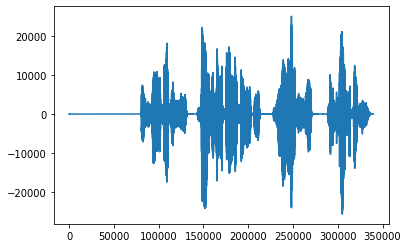

In [62]:
plt.plot(exdata,'-')

#### Plotting graph for first 1000 frames

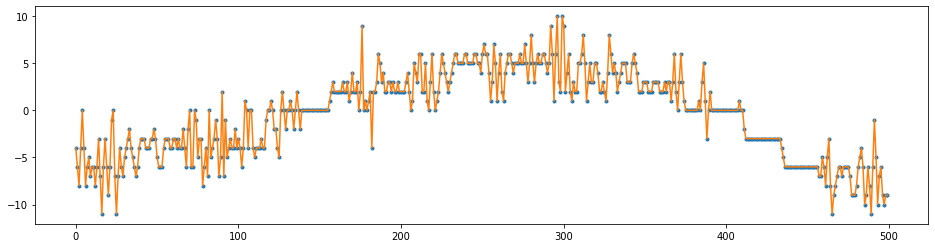

In [63]:
plt.figure(figsize=(16, 4))
plt.plot(exdata[:500], '.'); plt.plot(exdata[:500], '-');

### Splitting data in training and test sets

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data)
print("Train size =",X_train.shape)
print("Test size =",X_test.shape)

Train size = (1176,)
Test size = (393,)


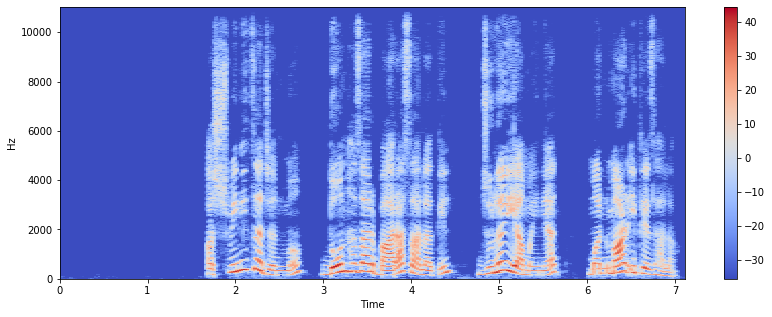

In [72]:
import librosa.display

x, sr = librosa.load(exfile)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, x_axis='time', y_axis='hz')
plt.colorbar()

Remaining: Converting text to array needed and then sampling and passing it to rnn